In [ ]:
# @inproceedings{cakmak2021spatio,
#         author = {Cakmak, Eren and Plank, Manuel and Calovi, Daniel S. and Jordan, Alex and Keim, Daniel},
#         title = {Spatio-Temporal Clustering Benchmark for Collective Animal Behavior},
#         year = {2021},
#         isbn = {9781450391221},
#         publisher = {Association for Computing Machinery},
#         address = {New York, NY, USA},
#         url = {https://doi.org/10.1145/3486637.3489487},
#         doi = {10.1145/3486637.3489487},
#         booktitle = {Proceedings of the 1st ACM SIGSPATIAL International Workshop on Animal Movement Ecology and Human Mobility},
#         pages = {5–8},
#         numpages = {4},
#         location = {Beijing, China},
#         series = {HANIMOB '21}
# }

In [ ]:
# the code is based on the following: https://github.com/eren-ck/st_dbscan/blob/master/README.md

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [4]:
directory = r"C:\Users\ainii\OneDrive\Documents\TempSpa\locations\sortedfiles\ST-DBSCAN\event_time_list\468.csv"

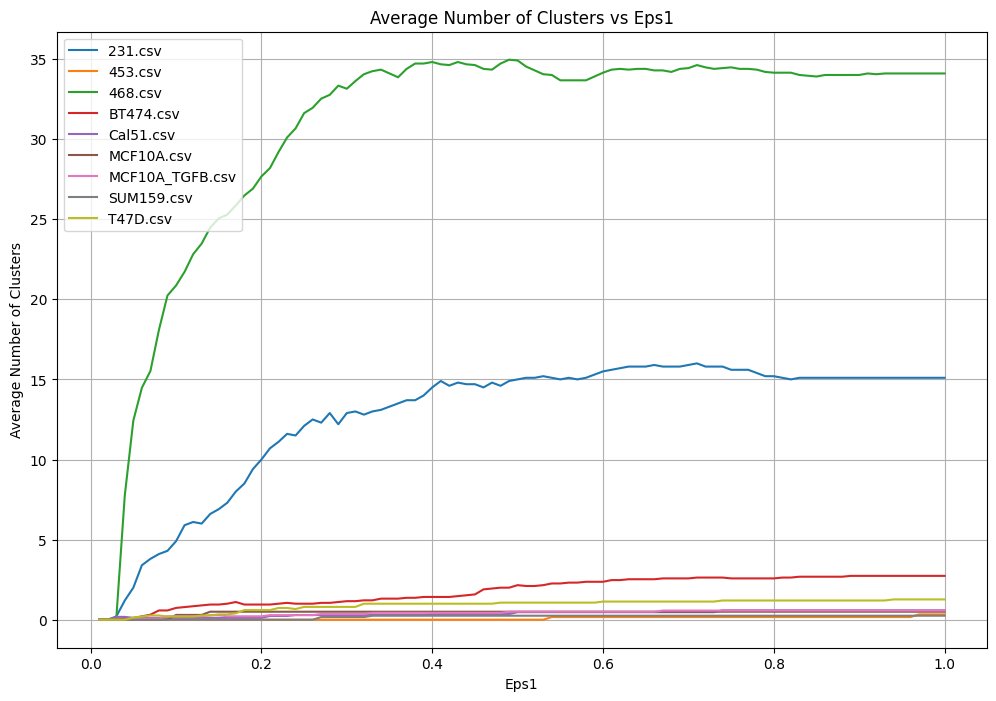

In [49]:
# eps1 
# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        
        # Load the data from the CSV file
        data = pd.read_csv(file_path)

        # Normalize cell_x and cell_y coordinates
        scaler = MinMaxScaler()
        data[['cell_x', 'cell_y']] = scaler.fit_transform(data[['cell_x', 'cell_y']])

        # Your existing code to calculate and plot average number of clusters vs eps1
        avg_num_clusters = []
        eps1_values = np.arange(0.01, 1.01, 0.01)

        for eps1 in eps1_values:
            num_clusters_for_eps1 = []

            for slip_area in data['slip_area'].unique():
                subset = data[data['slip_area'] == slip_area]
                st_dbscan = ST_DBSCAN(eps1=eps1, eps2=1, min_samples=6)
                time_coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
                st_dbscan.fit(time_coord_values)
                cluster_labels = st_dbscan.labels
                num_clusters_for_eps1.append(len(np.unique(cluster_labels[cluster_labels != -1])))

            avg_num_clusters_for_eps1 = np.mean(num_clusters_for_eps1)
            avg_num_clusters.append(avg_num_clusters_for_eps1)

        # Plot on the same graph
        plt.plot(eps1_values, avg_num_clusters, label=filename)

# Add labels and legend
plt.title('Average Number of Clusters vs Eps1')
plt.xlabel('Eps1')
plt.ylabel('Average Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()


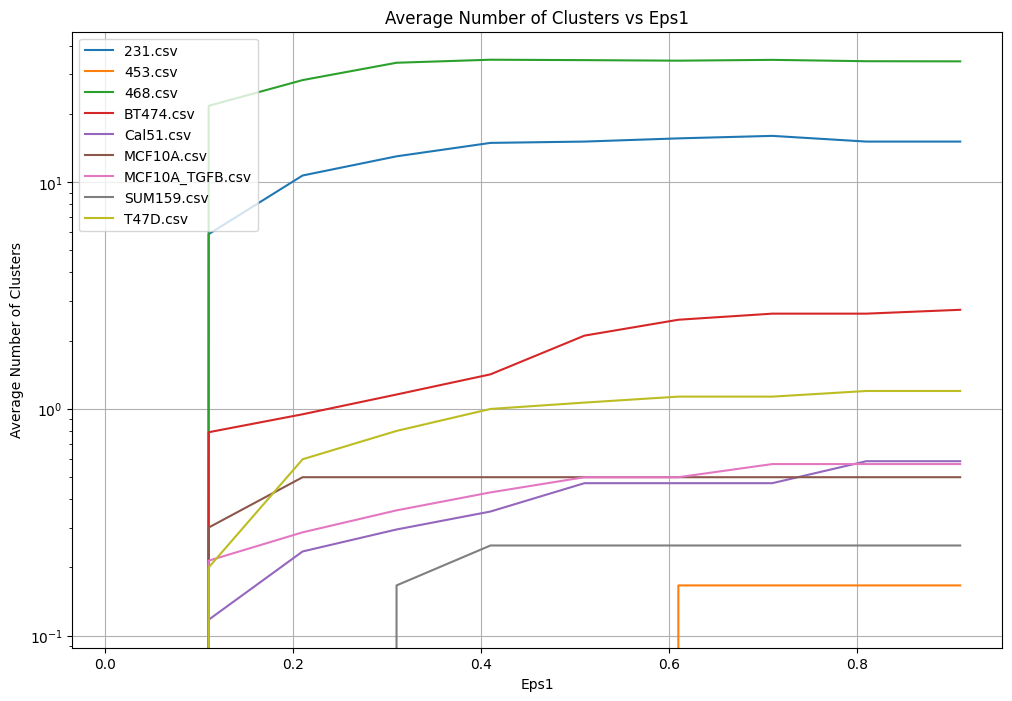

In [51]:
# eps1
# Y scale Log
# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        
        # Load the data from the CSV file
        data = pd.read_csv(file_path)

        # Normalize cell_x and cell_y coordinates
        scaler = MinMaxScaler()
        data[['cell_x', 'cell_y']] = scaler.fit_transform(data[['cell_x', 'cell_y']])

        # Your existing code to calculate and plot average number of clusters vs eps1
        avg_num_clusters = []
        eps1_values = np.arange(0.01, 1.01, 0.01)

        for eps1 in eps1_values:
            num_clusters_for_eps1 = []

            for slip_area in data['slip_area'].unique():
                subset = data[data['slip_area'] == slip_area]
                st_dbscan = ST_DBSCAN(eps1=eps1, eps2=1, min_samples=6)
                time_coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
                st_dbscan.fit(time_coord_values)
                cluster_labels = st_dbscan.labels
                num_clusters_for_eps1.append(len(np.unique(cluster_labels[cluster_labels != -1])))

            avg_num_clusters_for_eps1 = np.mean(num_clusters_for_eps1)
            avg_num_clusters.append(avg_num_clusters_for_eps1)

        # Plot on the same graph
        plt.plot(eps1_values, avg_num_clusters, label=filename)

# Add labels and legend
plt.title('Average Number of Clusters vs Eps1')
plt.xlabel('Eps1')
plt.ylabel('Average Number of Clusters')
plt.grid(True)
plt.legend()

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.show()


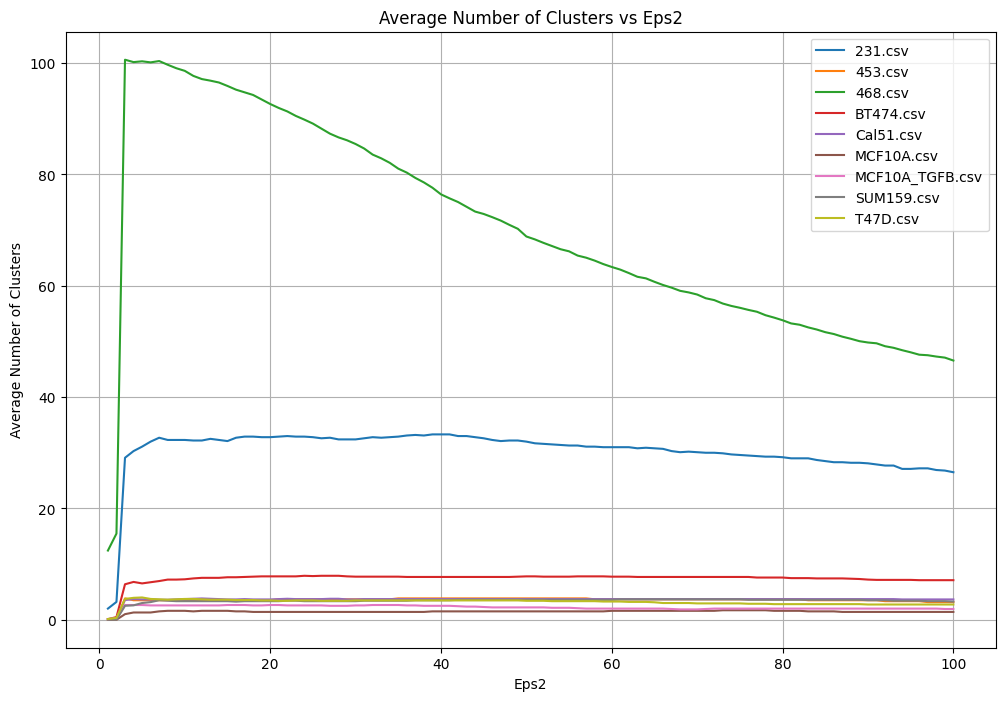

In [50]:
# Eps2 for eps = 0.05
# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        
        # Load the data from the CSV file
        data = pd.read_csv(file_path)

        # Normalize cell_x and cell_y coordinates
        scaler = MinMaxScaler()
        data[['cell_x', 'cell_y']] = scaler.fit_transform(data[['cell_x', 'cell_y']])

        # Your existing code to calculate and plot average number of clusters vs eps2
        avg_num_clusters = []
        eps2_values = range(1, 101, 1)

        for eps2 in eps2_values:
            num_clusters_for_eps2 = []

            for slip_area in data['slip_area'].unique():
                subset = data[data['slip_area'] == slip_area]
                st_dbscan = ST_DBSCAN(eps1=0.05, eps2=eps2, min_samples=6)
                time_coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
                st_dbscan.fit(time_coord_values)
                cluster_labels = st_dbscan.labels
                num_clusters_for_eps2.append(len(np.unique(cluster_labels[cluster_labels != -1])))

            avg_num_clusters_for_eps2 = np.mean(num_clusters_for_eps2)
            avg_num_clusters.append(avg_num_clusters_for_eps2)

        # Plot on the same graph
        plt.plot(eps2_values, avg_num_clusters, label=filename)

# Add labels and legend
plt.title('Average Number of Clusters vs Eps2')
plt.xlabel('Eps2')
plt.ylabel('Average Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()


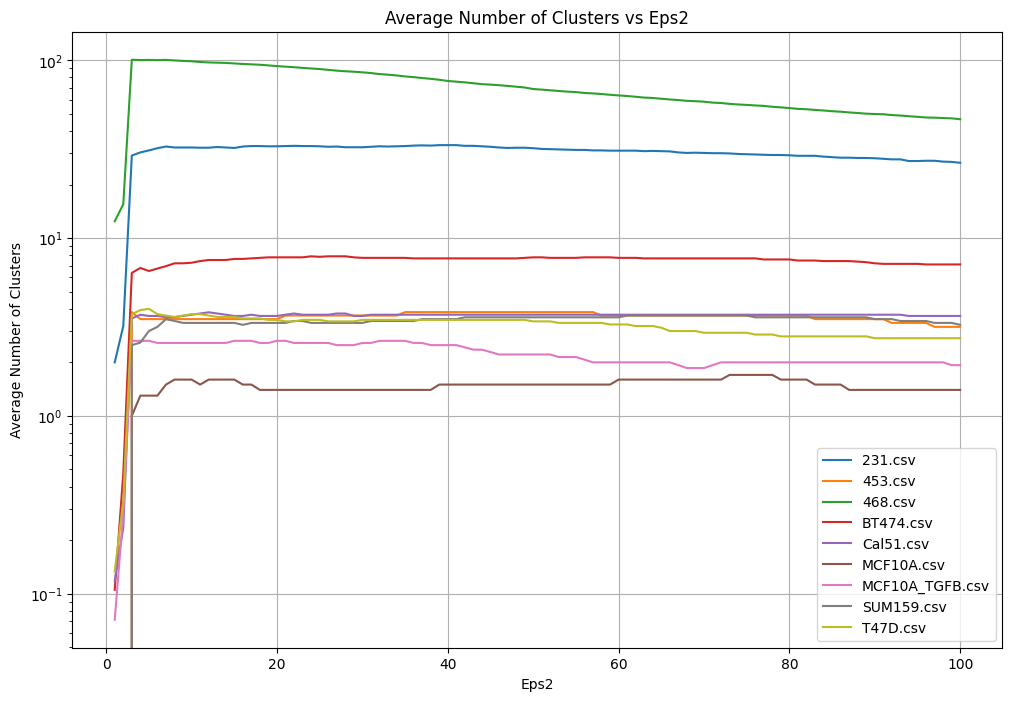

In [52]:
# Eps2 for eps1 = 0.05
# Y scale Log
# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        
        # Load the data from the CSV file
        data = pd.read_csv(file_path)

        # Normalize cell_x and cell_y coordinates
        scaler = MinMaxScaler()
        data[['cell_x', 'cell_y']] = scaler.fit_transform(data[['cell_x', 'cell_y']])

        # Your existing code to calculate and plot average number of clusters vs eps2
        avg_num_clusters = []
        eps2_values = range(1, 101, 1)

        for eps2 in eps2_values:
            num_clusters_for_eps2 = []

            for slip_area in data['slip_area'].unique():
                subset = data[data['slip_area'] == slip_area]
                st_dbscan = ST_DBSCAN(eps1=0.05, eps2=eps2, min_samples=6)
                time_coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
                st_dbscan.fit(time_coord_values)
                cluster_labels = st_dbscan.labels
                num_clusters_for_eps2.append(len(np.unique(cluster_labels[cluster_labels != -1])))

            avg_num_clusters_for_eps2 = np.mean(num_clusters_for_eps2)
            avg_num_clusters.append(avg_num_clusters_for_eps2)

        # Plot on the same graph
        plt.plot(eps2_values, avg_num_clusters, label=filename)

# Add labels and legend
plt.title('Average Number of Clusters vs Eps2')
plt.xlabel('Eps2')
plt.ylabel('Average Number of Clusters')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()


In [6]:
# Eps2 for eps1 = 0.5
# Y scale Log
# Create a new figure
plt.figure(figsize=(12, 8))

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)
        
        # Load the data from the CSV file
        data = pd.read_csv(file_path)

        # Normalize cell_x and cell_y coordinates
        scaler = MinMaxScaler()
        data[['cell_x', 'cell_y']] = scaler.fit_transform(data[['cell_x', 'cell_y']])

        # Your existing code to calculate and plot average number of clusters vs eps2
        avg_num_clusters = []
        eps2_values = range(1, 101, 1)

        for eps2 in eps2_values:
            num_clusters_for_eps2 = []

            for slip_area in data['slip_area'].unique():
                subset = data[data['slip_area'] == slip_area]
                st_dbscan = ST_DBSCAN(eps1=0.5, eps2=eps2, min_samples=6)
                time_coord_values = subset[['Event_time', 'cell_x', 'cell_y']]
                st_dbscan.fit(time_coord_values)
                cluster_labels = st_dbscan.labels
                num_clusters_for_eps2.append(len(np.unique(cluster_labels[cluster_labels != -1])))

            avg_num_clusters_for_eps2 = np.mean(num_clusters_for_eps2)
            avg_num_clusters.append(avg_num_clusters_for_eps2)

        # Plot on the same graph
        plt.plot(eps2_values, avg_num_clusters, label=filename)

# Add labels and legend
plt.title('Average Number of Clusters vs Eps2')
plt.xlabel('Eps2')
plt.ylabel('Average Number of Clusters')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\ainii\\OneDrive\\Documents\\TempSpa\\locations\\sortedfiles\\ST-DBSCAN\\event_time_list\\468.csv'

<Figure size 1200x800 with 0 Axes>

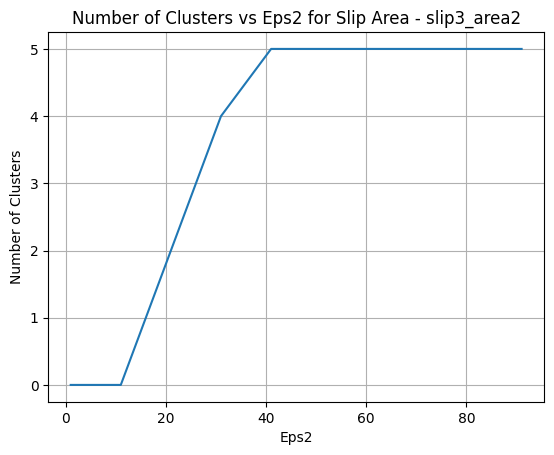

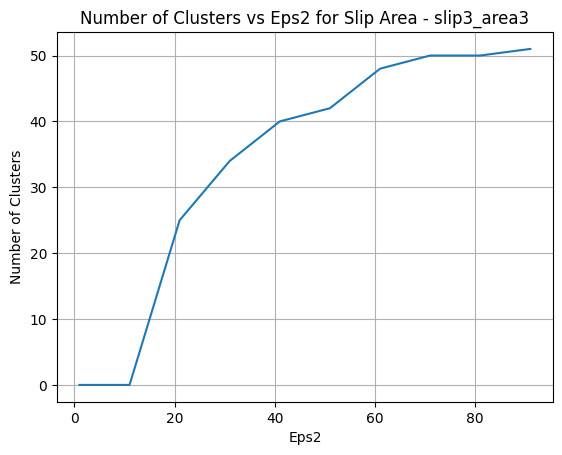

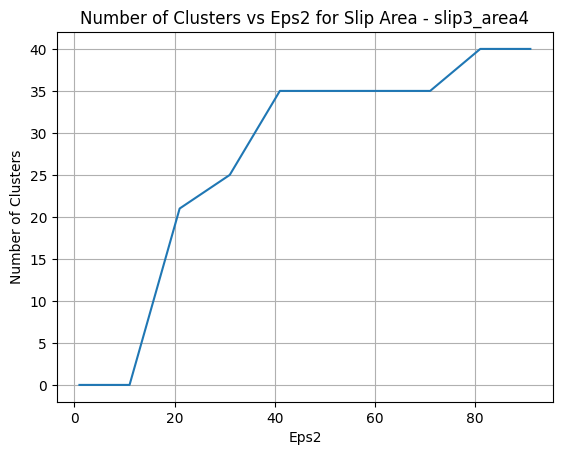

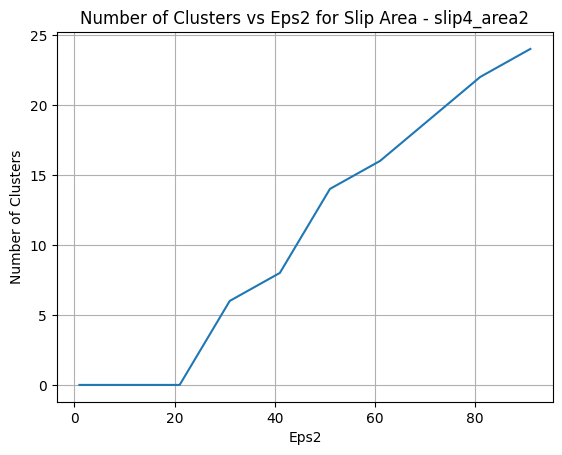

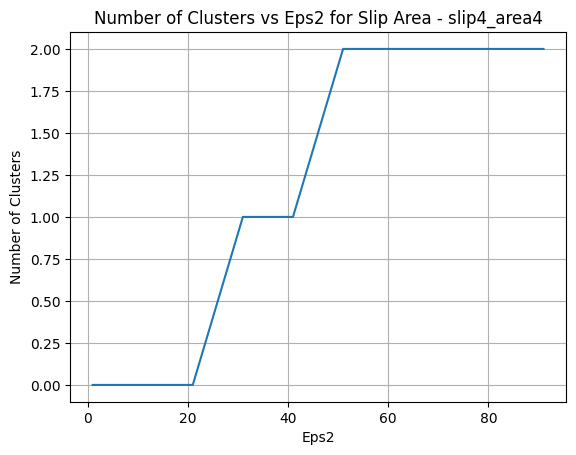

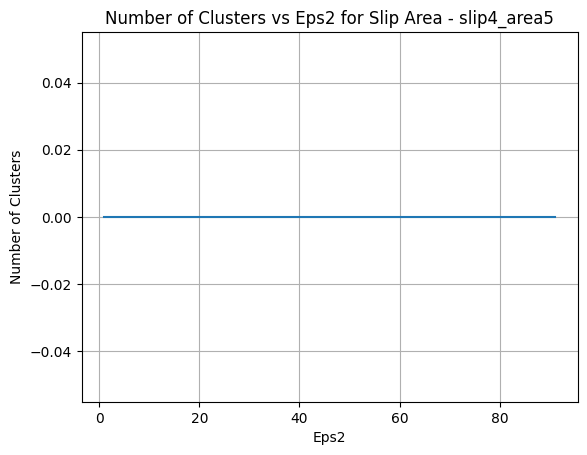

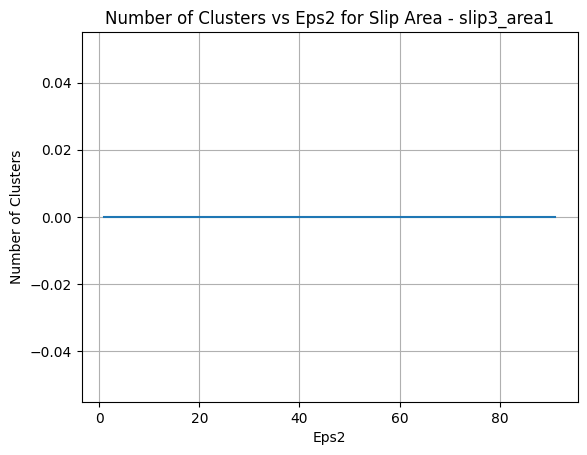

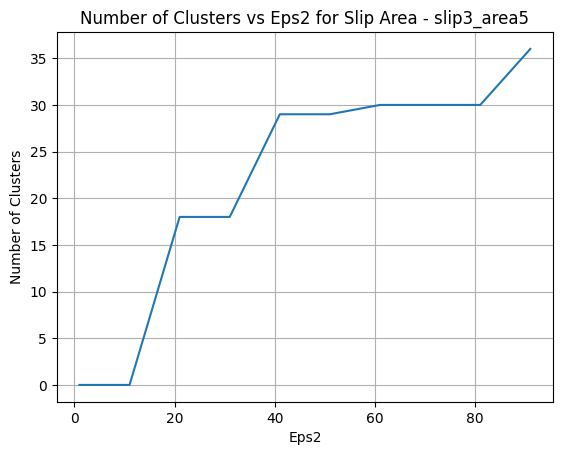

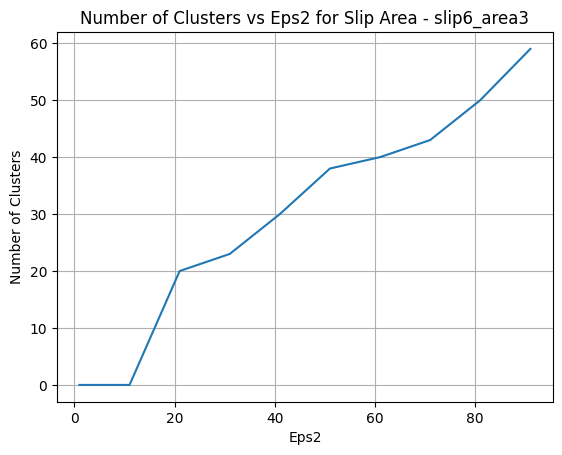

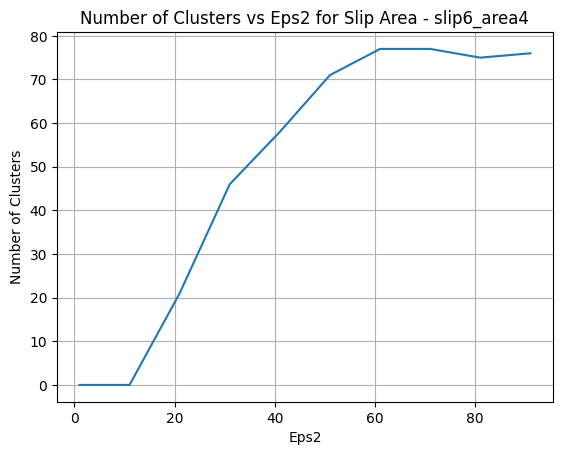

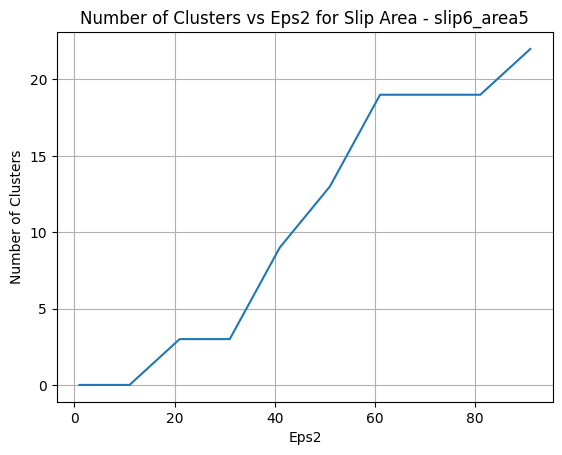

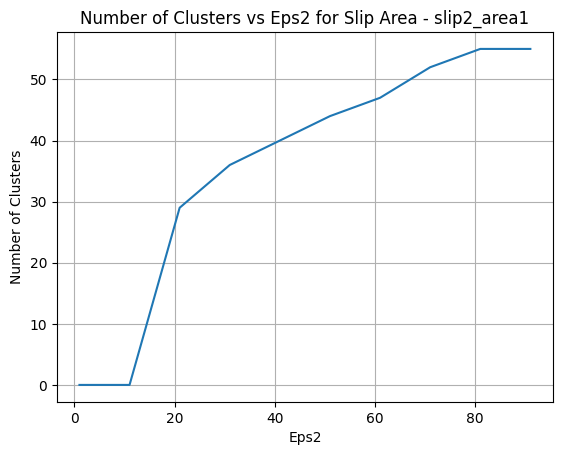

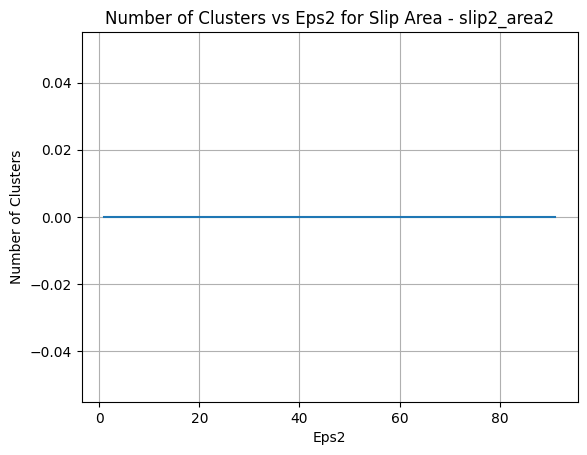

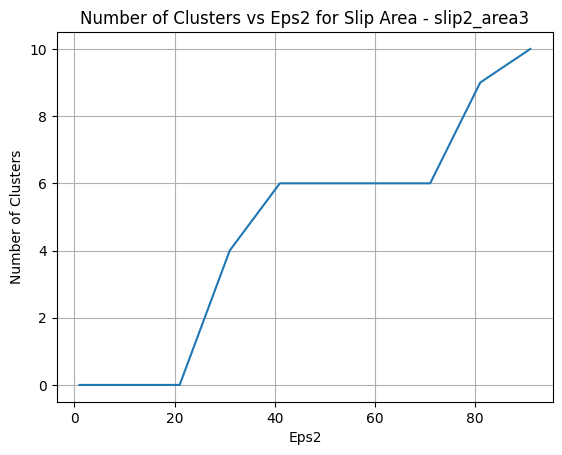

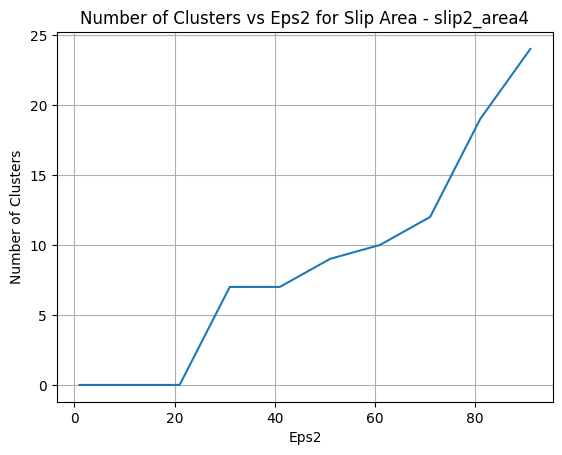

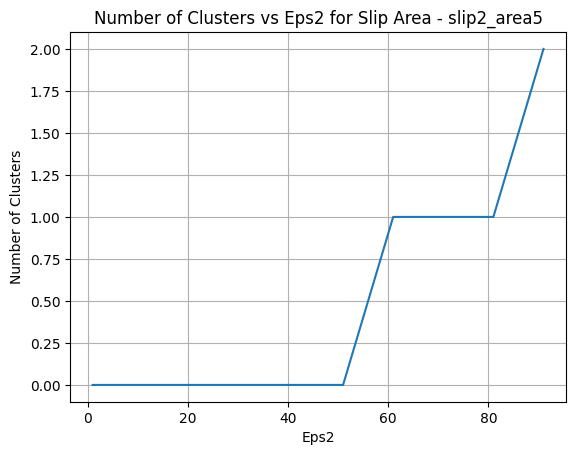

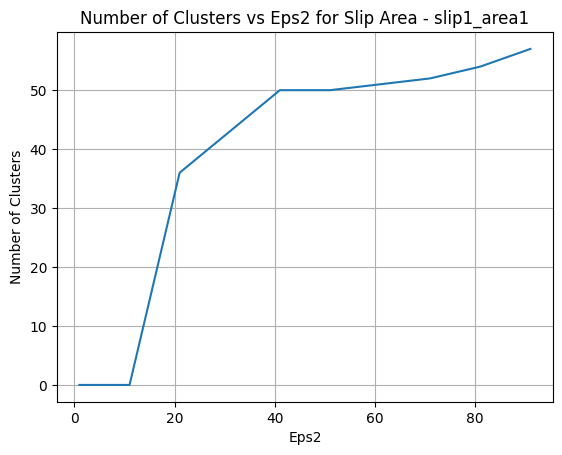

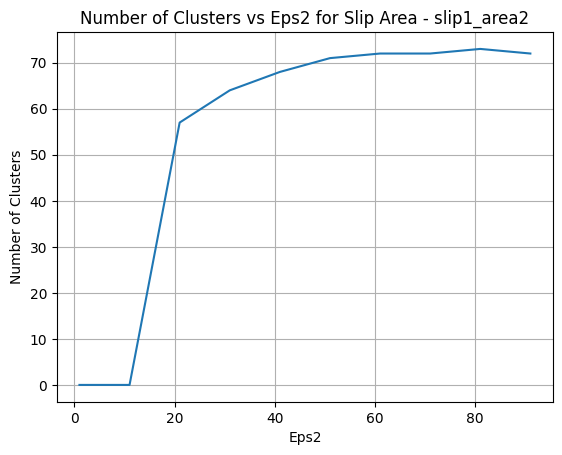

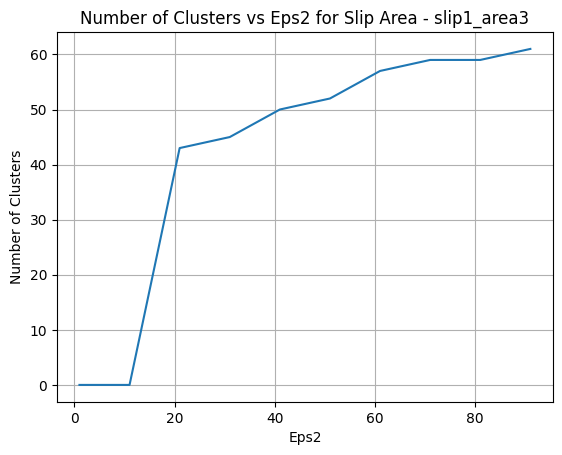

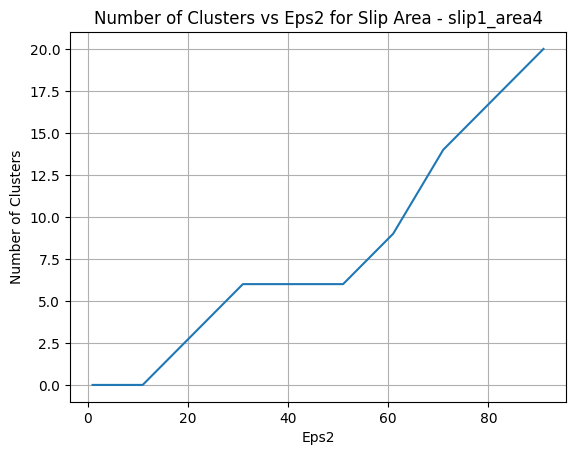

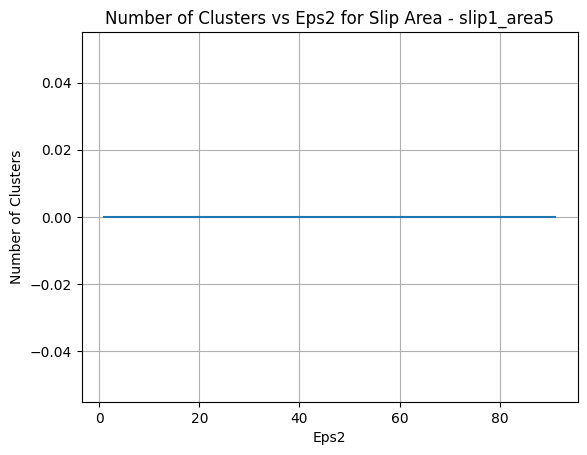

In [34]:
##############
#####KEEP#####
##############

slip_area_combinations = data['slip_area'].unique()
num_clusters= []
avg_cluster_size = np.zeros(10)  # Initialize array to store average cluster size

for slip_area in slip_area_combinations:
    # Extract subset for each slip area
    subset = data[data['slip_area'] == slip_area]  

    # Define range of eps1 values
    eps1_values = range(1,101,10)  # Range from 0 to 100, inclusive   # CHANGE TIME RANGE HERE
    num_clusters_for_eps1 = []  # Store the number of clusters for each eps2 value

    for eps1 in eps1_values:
        # Apply ST_DBSCAN for each eps1 value
        st_dbscan = ST_DBSCAN(eps1=eps1, eps2=1, min_samples=6) 
        time_coord_values = subset.iloc[:, [1, 3, 4]]
        st_dbscan.fit(time_coord_values)  # Fit ST_DBSCAN
        cluster_labels = st_dbscan.labels
        num_clusters_for_eps1.append(len(np.unique(cluster_labels[cluster_labels != -1])))

        
          # Plotting the number of clusters vs eps2 for the slip area
    plt.plot(eps1_values, num_clusters_for_eps1)
    plt.title(f'Number of Clusters vs Eps2 for Slip Area - {slip_area}')
    plt.xlabel('Eps2')
    plt.ylabel('Number of Clusters')
    plt.grid(True)
    plt.show()
    
# Store number of clusters for each eps2 value for this slip area
num_clusters.append(num_clusters_for_eps1)



In [ ]:
#################
######KEEP#######
#################


#######Plot function
def plot(coord_values, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]

        clust = coord_values[labels == i]
        plt.scatter(clust.iloc[:, 0], clust.iloc[:, 1], c=[col], s=15)
    plt.show()

# Perform ST-DBSCAN for each slip area
slip_area_combinations_468 = data_468['Slip_Area'].unique()
num_clusters_468 = []

for slip_area in slip_area_combinations_468:
    subset = data_468[data_468['Slip_Area'] == slip_area]  
    
    # Plot for each slip
    # plt.scatter(subset['X'], subset['Y'])
    # plt.title(f'Excitation Plot - {slip_area}')
    # plt.xlabel('X Coordinate')
    # plt.ylabel('Y Coordinate')
    # plt.show()

    st_dbscan = ST_DBSCAN(eps1=1, eps2=1, min_samples=6) 
    #eps1 = distance radius, eps2  = time radius, min_samples = min number of points for a core point
    #to calculate optimum min_sample, use 2*dimensions(D), hence for three dimensions, use 6
    coord_values_468 = subset.iloc[:, :-1]  # Select columns 0, 1, and 2
    st_dbscan.fit(coord_values_468)
    
    cluster_labels = st_dbscan.labels
    
    # Plot clusters for each slip area
    plt.title("DBSCAN Clustering for Slip Area: " + slip_area) 
    plot(coord_values_468.iloc[:, 1:], cluster_labels)
    num_clusters_468.append(len(np.unique(cluster_labels[cluster_labels != -1])))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.barh(slip_area_combinations_468, num_clusters_468, color='skyblue', edgecolor='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Slip Area')
plt.title(f'Number of Clusters per Slip Area - Breast Cancer Type: L468')
plt.grid(axis='x', alpha=0.5)
plt.show()


In [ ]:
# Initialize array to store average number of clusters for each eps1 value
avg_num_clusters = []

# Initialize array to store eps1 values
eps1_values = range(1, 101, 10)  # Range from 1 to 100, inclusive

for eps1 in eps1_values:
    num_clusters_for_eps1 = []  # Store the number of clusters for each eps1 value across slip areas

    for slip_area in slip_area_combinations:
        # Extract subset for each slip area
        subset = data[data['slip_area'] == slip_area]

        # Apply ST_DBSCAN for each eps1 value
        st_dbscan = ST_DBSCAN(eps1=eps1, eps2=1, min_samples=6)
        time_coord_values = subset.iloc[:, [1, 3, 4]]
        st_dbscan.fit(time_coord_values)  # Fit ST_DBSCAN
        cluster_labels = st_dbscan.labels
        num_clusters_for_eps1.append(len(np.unique(cluster_labels[cluster_labels != -1])))

    # Calculate average number of clusters for this eps1 value
    avg_num_clusters_for_eps1 = np.mean(num_clusters_for_eps1)
    avg_num_clusters.append(avg_num_clusters_for_eps1)

# Plotting the average number of clusters vs eps1
plt.plot(eps1_values, avg_num_clusters)
plt.title('Average Number of Clusters vs Eps1')
plt.xlabel('Eps1')
plt.ylabel('Average Number of Clusters')
plt.grid(True)
plt.show()

C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


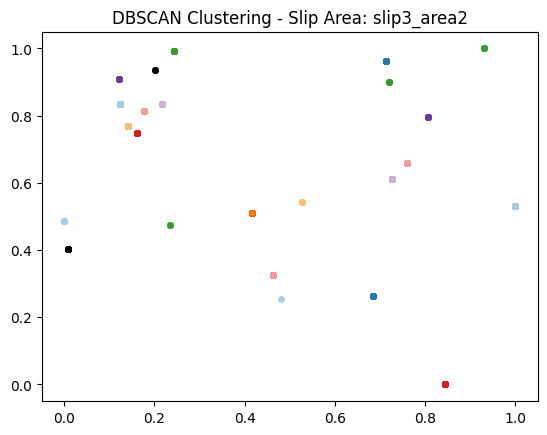

Number of clusters for Slip Area slip3_area2: 25


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


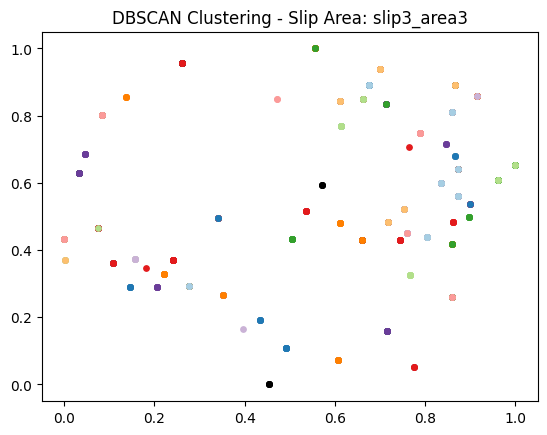

Number of clusters for Slip Area slip3_area3: 54


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


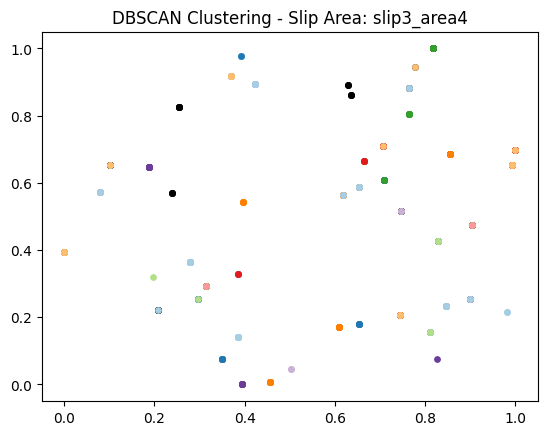

Number of clusters for Slip Area slip3_area4: 47


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


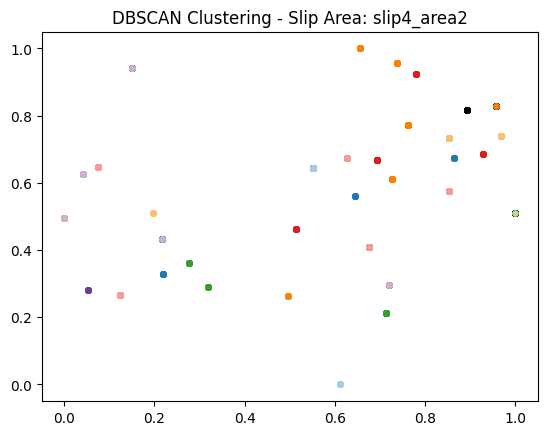

Number of clusters for Slip Area slip4_area2: 48


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


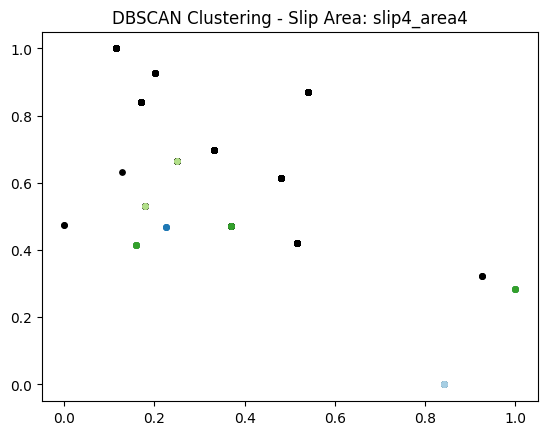

Number of clusters for Slip Area slip4_area4: 4


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


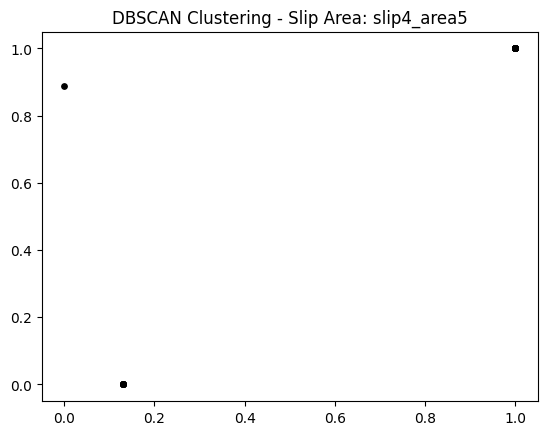

C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


Number of clusters for Slip Area slip4_area5: 0


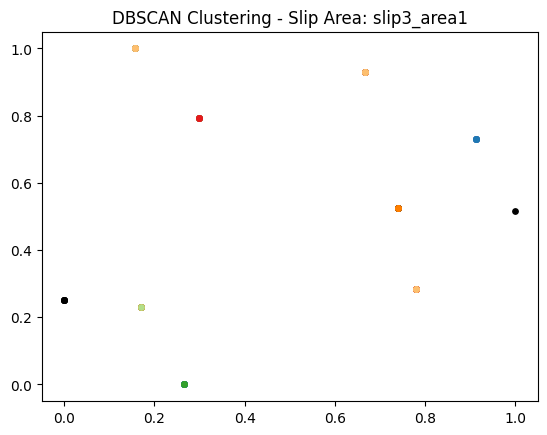

Number of clusters for Slip Area slip3_area1: 17


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


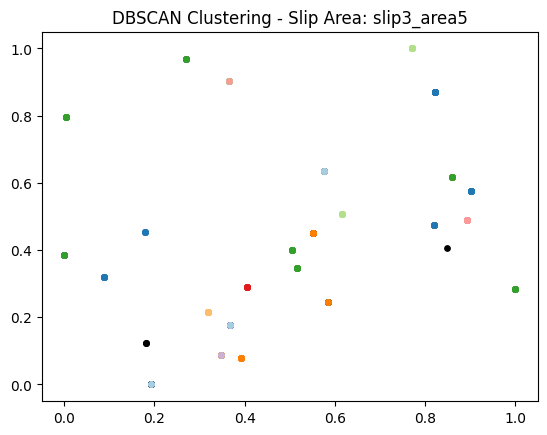

Number of clusters for Slip Area slip3_area5: 44


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


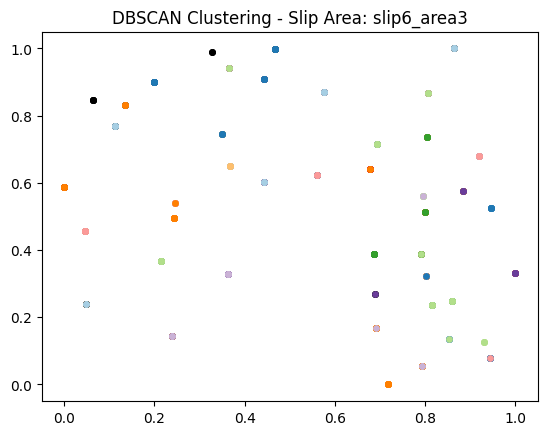

Number of clusters for Slip Area slip6_area3: 63


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


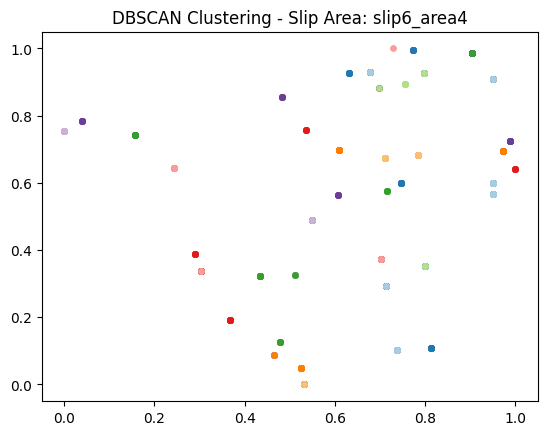

Number of clusters for Slip Area slip6_area4: 62


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


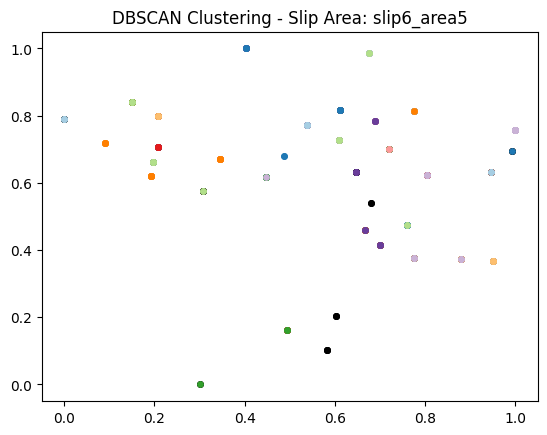

Number of clusters for Slip Area slip6_area5: 43


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


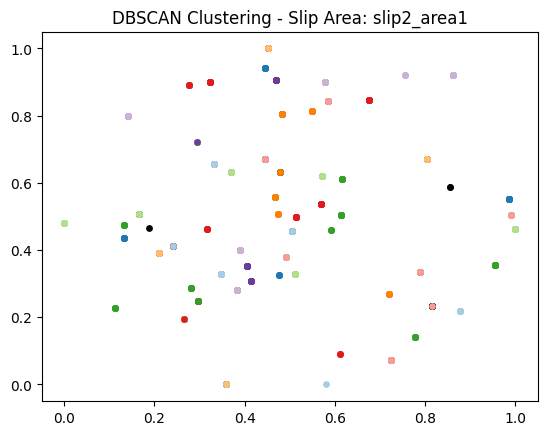

Number of clusters for Slip Area slip2_area1: 49


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


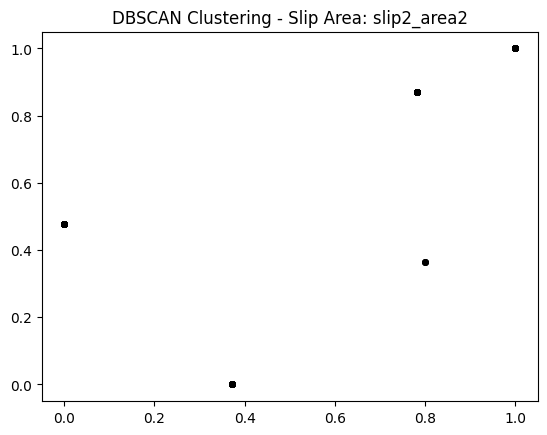

C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


Number of clusters for Slip Area slip2_area2: 0


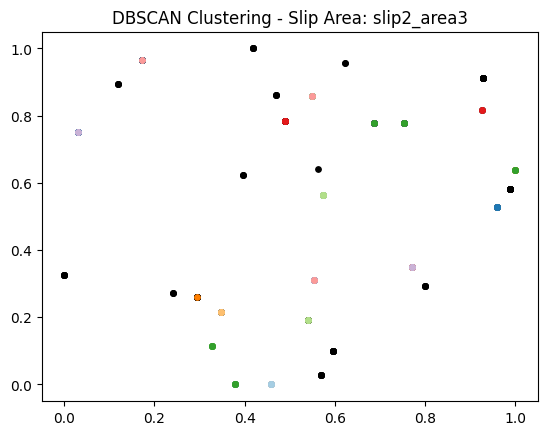

Number of clusters for Slip Area slip2_area3: 15


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


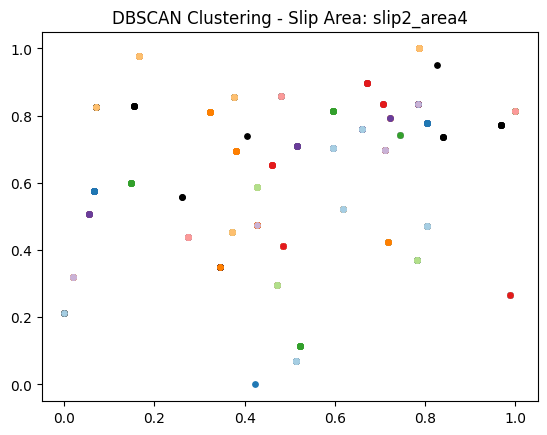

Number of clusters for Slip Area slip2_area4: 47


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


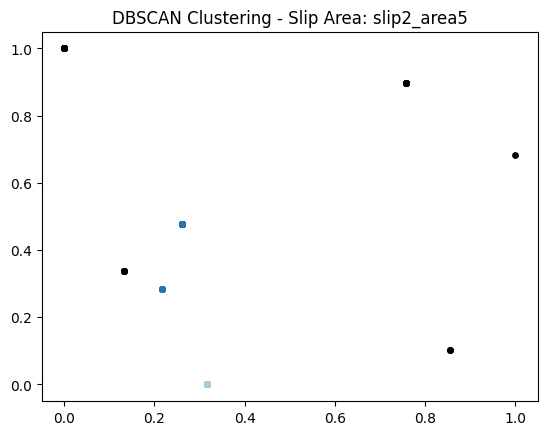

Number of clusters for Slip Area slip2_area5: 2


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


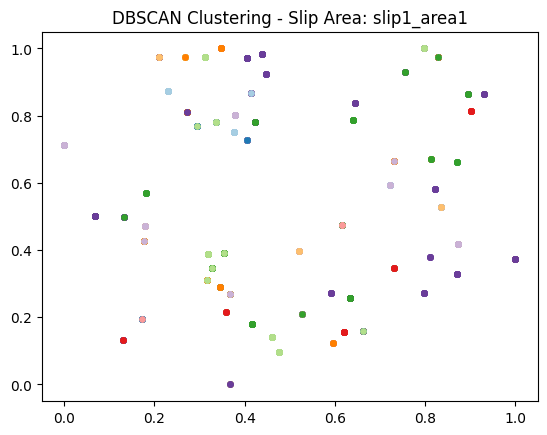

Number of clusters for Slip Area slip1_area1: 58


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


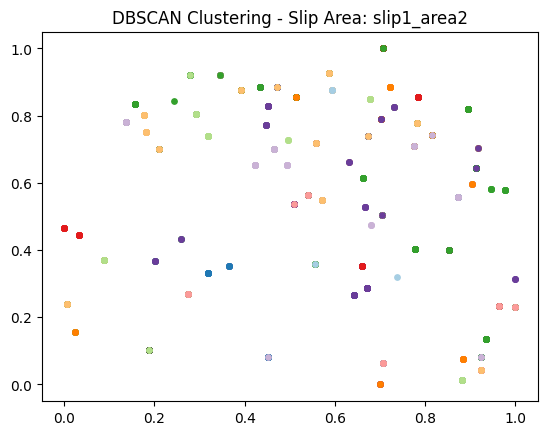

Number of clusters for Slip Area slip1_area2: 40


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


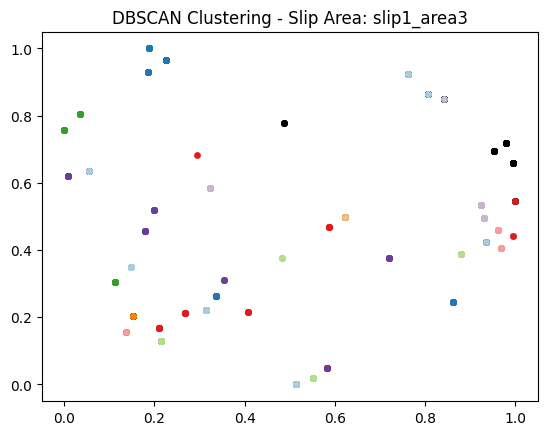

Number of clusters for Slip Area slip1_area3: 42


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


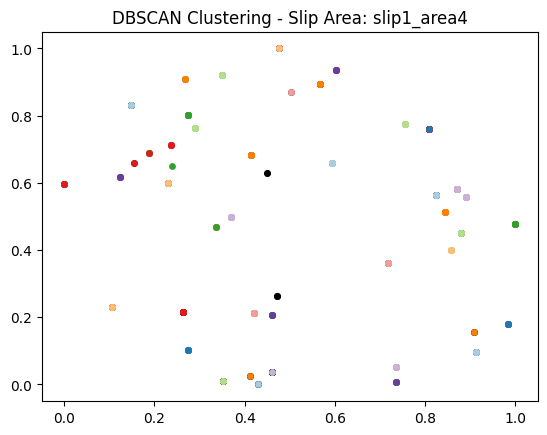

Number of clusters for Slip Area slip1_area4: 53


C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
C:\Users\ainii\AppData\Local\Temp\ipykernel_25592\3582608543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())


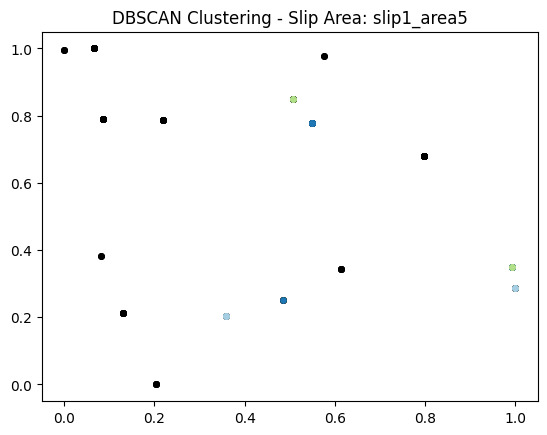

Number of clusters for Slip Area slip1_area5: 3


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN  # Assuming you have st_dbscan module installed

#######Plot function
def plot(coord_values, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']

    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]

        clust = coord_values[labels == i]
        plt.scatter(clust.iloc[:, 0], clust.iloc[:, 1], c=[col], s=15)
    plt.show()

# Read data from file
file_path = r"C:\Users\ainii\OneDrive\Documents\TempSpa\locations\sortedfiles\ST-DBSCAN\event_time_list\468.csv"
data = pd.read_csv(file_path)  # Adjust this according to your file format

# Get unique slip areas
slip_areas = data['slip_area'].unique()

# Perform ST-DBSCAN for each slip area
for slip_area in slip_areas:
    subset = data[data['slip_area'] == slip_area]
    
    # Normalize X and Y coordinates
    subset['cell_x'] = (subset['cell_x'] - subset['cell_x'].min()) / (subset['cell_x'].max() - subset['cell_x'].min())
    subset['cell_y'] = (subset['cell_y'] - subset['cell_y'].min()) / (subset['cell_y'].max() - subset['cell_y'].min())
    
    # Perform ST-DBSCAN
    st_dbscan = ST_DBSCAN(eps1=0.7, eps2=1, min_samples=6) 
    # eps1 = distance radius, eps2 = time radius, min_samples = min number of points for a core point
    # to calculate optimum min_sample, use 2*dimensions(D), hence for three dimensions, use 6
    coord_values = subset[['Event_time', 'cell_x', 'cell_y']]  # Assuming columns are normalized and z_coordinate
    st_dbscan.fit(coord_values)
    cluster_labels = st_dbscan.labels

    # Plot clusters
    plt.title(f"DBSCAN Clustering - Slip Area: {slip_area}") 
    plot(coord_values.iloc[:, 1:], cluster_labels)

    # Count clusters
    num_clusters = len(np.unique(cluster_labels[cluster_labels != -1]))
    print(f"Number of clusters for Slip Area {slip_area}: {num_clusters}")
